# Cryptocurrency Market Analysis

Cryptocurrencies are fast becoming rivals to traditional currency across the world. The digital currencies are available to purchase in many different places, making it accessible to everyone, and with retailers accepting various cryptocurrencies it could be a sign that money as we know it is about to go through a major change.

In addition, the blockchain technology on which many cryptocurrencies are based, with its revolutionary distributed digital backbone, has many other promising applications. Implementations of secure, decentralized systems can aid us in conquering organizational issues of trust and security that have plagued our society throughout the ages. In effect, we can fundamentally disrupt industries core to economies, businesses and social structures, eliminating inefficiency and human error.

This is an exciting time to become part of the crypto revolution and what better way than to start with some exploratory analysis of the crypto market using data science techniques?

## Contents:
* [Oldest and newest Cryptocurrencies](#oldestNewest)
* [Rankings](#ranking)
* [Markevalue](#marketValue")
* [Volume](#volume")
* [Candlestick Charts ](#candlestickCharts")
* [Moving Averages](#movingAverages")

First some setup work and pulling out basic information about our data...

In [1]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

import matplotlib.dates as mdates
# Import the mplfinance package
import mplfinance as mpf

# Default number of currencies we will look at at each step
x = 10

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessevent/all-crypto-currencies")

print("Path to dataset files:", path)

100%|██████████| 22.5M/22.5M [00:01<00:00, 15.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jessevent/all-crypto-currencies/versions/17


In [5]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/jessevent/all-crypto-currencies/versions/17/crypto-markets.csv')
#df.info()
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32


**Open** is the price of the stock at the beginning of the trading day (it need not be the closing price of the previous trading day),
**High** is the highest price of the stock on that trading day,
**Low** the lowest price of the stock on that trading day,
and **Close** the price of the stock at closing time.

In [6]:
# Transform date to date object
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [7]:
# Get a df containing only the latest date's data for each currency
print("Latest crypto data")
latest_df = df[df['date'] == max(df['date'])]
latest_df.head()

Latest crypto data


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
941284,42-coin,42,42-coin,2018-11-30,1228,23272.24,25082.69,21436.75,22665.93,308.0,951968.0,0.3371,3645.94
941749,bit20,BTWTY,Bit20,2018-11-30,1505,59697.89,59697.89,58616.07,59274.96,0.0,60223.0,0.6091,1081.82
942296,project-x,NANOX,Project-X,2018-11-30,1727,22872.09,23086.98,19040.91,21136.72,125.0,1654.0,0.5180,4046.07


In [8]:
# Number of cryptocurrencies listed
#latest_df.shape
print("Number of cryptocurrencies listed")
latest_df['symbol'].nunique()

Number of cryptocurrencies listed


3

# Oldest and newest Cryptocurrencies <a name="oldestNewest"></a>

In [9]:
# What start date do we have for each cryptocurrency?
start_df = pd.DataFrame({'start_date' : df.groupby( [ "name", "ranknow"] )['date'].min()}).reset_index()

# List the oldest ones
print("Oldest Cryptocurrencies")
start_df.sort_values(['start_date']).head(x)

Oldest Cryptocurrencies


,name,ranknow,start_date
231,Bitcoin,1,2013-04-28
1284,Novacoin,700,2013-04-28
1241,Namecoin,371,2013-04-28
1776,Terracoin,895,2013-04-28
1393,Peercoin,159,2013-04-28
1089,Litecoin,7,2013-04-28
1181,Mincoin,1520,2013-05-03
760,Feathercoin,415,2013-05-03
787,Freicoin,1412,2013-05-03
1004,Ixcoin,1301,2013-05-08


In [10]:
# List the newest ones
print("Newest Cryptocurrencies")
start_df.sort_values(['start_date']).tail(x)

Newest Cryptocurrencies


,name,ranknow,start_date
1178,Micromines,1134,2018-11-19
332,Business Credit Alliance Chain,453,2018-11-21
1282,Noir,1942,2018-11-21
942,ILCoin,1861,2018-11-27
1590,STACS,1785,2018-11-27
930,HyperQuant,1763,2018-11-27
215,BitNautic Token,1897,2018-11-28
146,BEAT,1849,2018-11-28
122,Atlas Protocol,1751,2018-11-28
283,Blockchain Certified Data Token,1905,2018-11-28


## Ranking <a name="ranking"></a>

In [11]:
# Get a list of the top x currencies
latest_df[latest_df['ranknow'] <= x].groupby('ranknow').name.unique()

,name
ranknow,


In [12]:
# Is ranknow ordering the same as the marketcap ordering?
latest_df.sort_values(by=['market'], ascending=[False])
latest_df[['name','market']].head(x)

# Answer: Yes

,name,market
941284,42-coin,951968.0
941749,Bit20,60223.0
942296,Project-X,1654.0


## Markevalue <a name="marketValue"></a>

Also known as market capitalization, is obtained by multiplying the circulating supply of coins by the current coin price. It is one way to rank the relative size of a cryptocurrency.

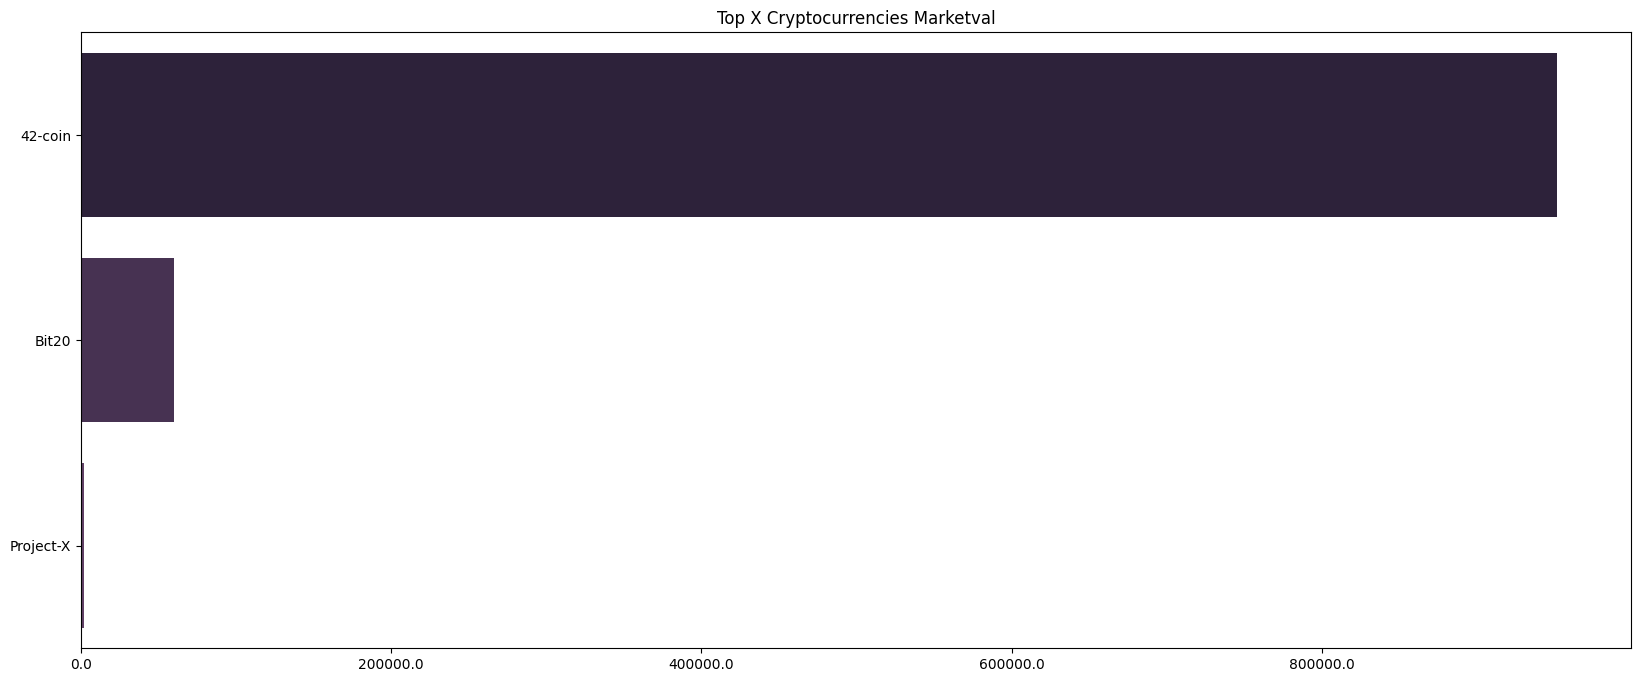

In [13]:
# Plot the top X currencies latest marketval
name = latest_df['name'].unique()
currency  = []
marketval = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     marketval.append(filtered['market'].values[0])

f, ax = plt.subplots(figsize=(20, 8))
g = sns.barplot( y = currency, x = marketval, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top X Cryptocurrencies Marketval")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

## Volume <a name="volume"></a>

Volume is a measure of how much of a given financial asset has been traded in a given period of time and even though so simple, it can be a powerful indicator for trading.

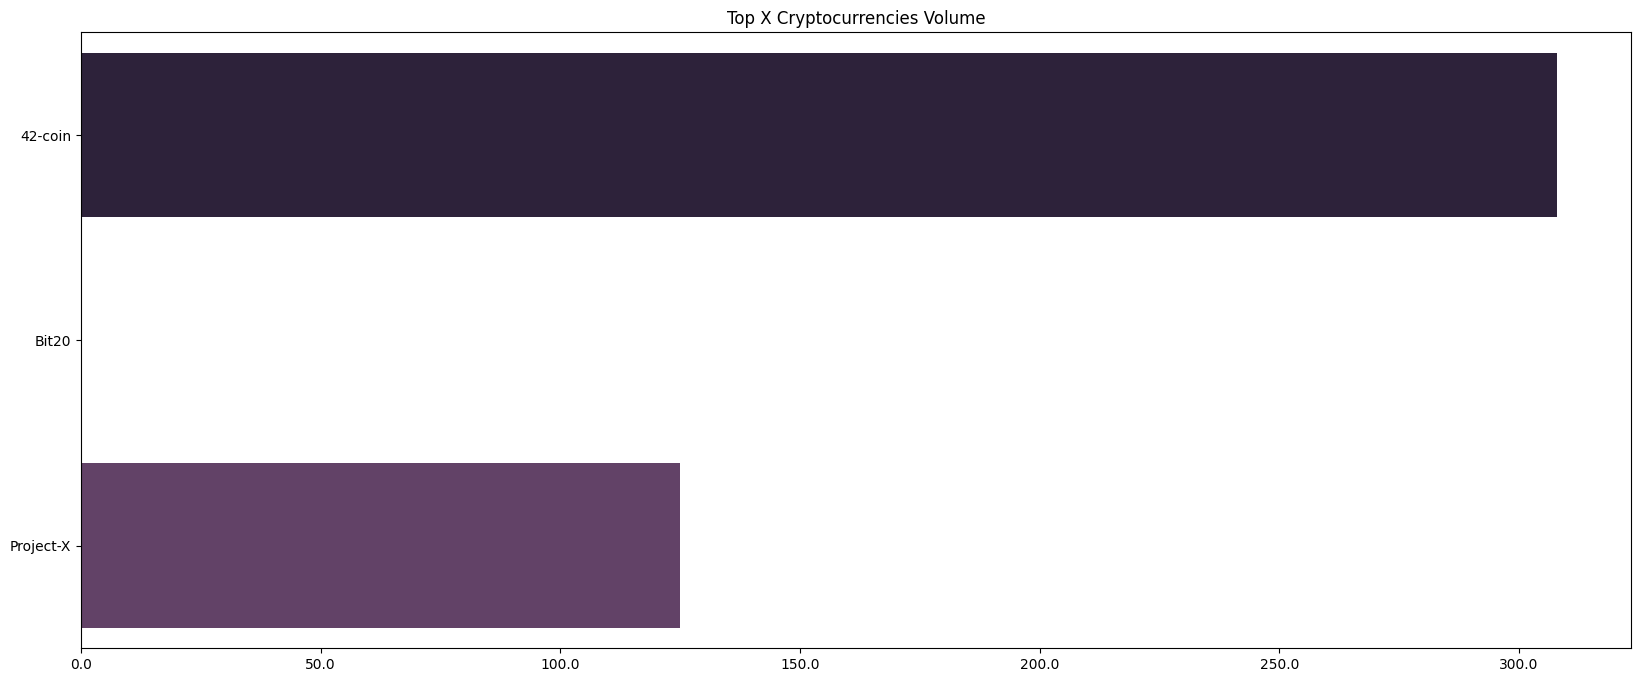

In [14]:
# Plot the top X currencies latest volume
latest_df
currency  = []
volume = []
x_currencies = name[:x]
for i, cn in enumerate(x_currencies):
     filtered = latest_df[(latest_df['name']==str(cn))]
     currency.append(str(cn))
     volume.append(filtered['volume'].values[0])

f, ax = plt.subplots(figsize=(20, 8))
g = sns.barplot( y = currency, x = volume, palette=sns.cubehelix_palette(x, reverse=True))
plt.title("Top X Cryptocurrencies Volume")
ax.set_xticklabels(ax.get_xticks())
fig=plt.gcf()
plt.show()

https://www.investopedia.com/articles/technical/02/010702.asp
A rising market should see rising volume. Buyers require increasing numbers and increasing enthusiasm in order to keep pushing prices higher. Increasing price and decreasing volume show lack of interest, and this is a warning of a potential reversal. This can be hard to wrap your mind around, but the simple fact is that a price drop (or rise) on little volume is not a strong signal. A price drop (or rise) on large volume is a stronger signal that something in the stock has fundamentally changed.

In the next sections we look at candlestick charts and moving averages to see if we can see rising or fallig volumes / trends.

## Candlestick Charts <a name="candlestickCharts"></a>

Candlestick charts provide an easy-to-interpret picture of price action.

The filled portion of the candlestick is called the body. The lines above and below the body represent the high/low range and are called shadows (or “wicks” or “tails”).
The high is marked by the top of the upper shadow and the low by the bottom of the lower shadow.

If the stock closes higher than its opening price, a hollow/green candlestick is drawn with the bottom of the body representing the opening price and the top of the body representing the closing price.

If the stock closes lower than its opening price, a filled/red candlestick is drawn with the top of the body representing the opening price and the bottom of the body representing the closing price.

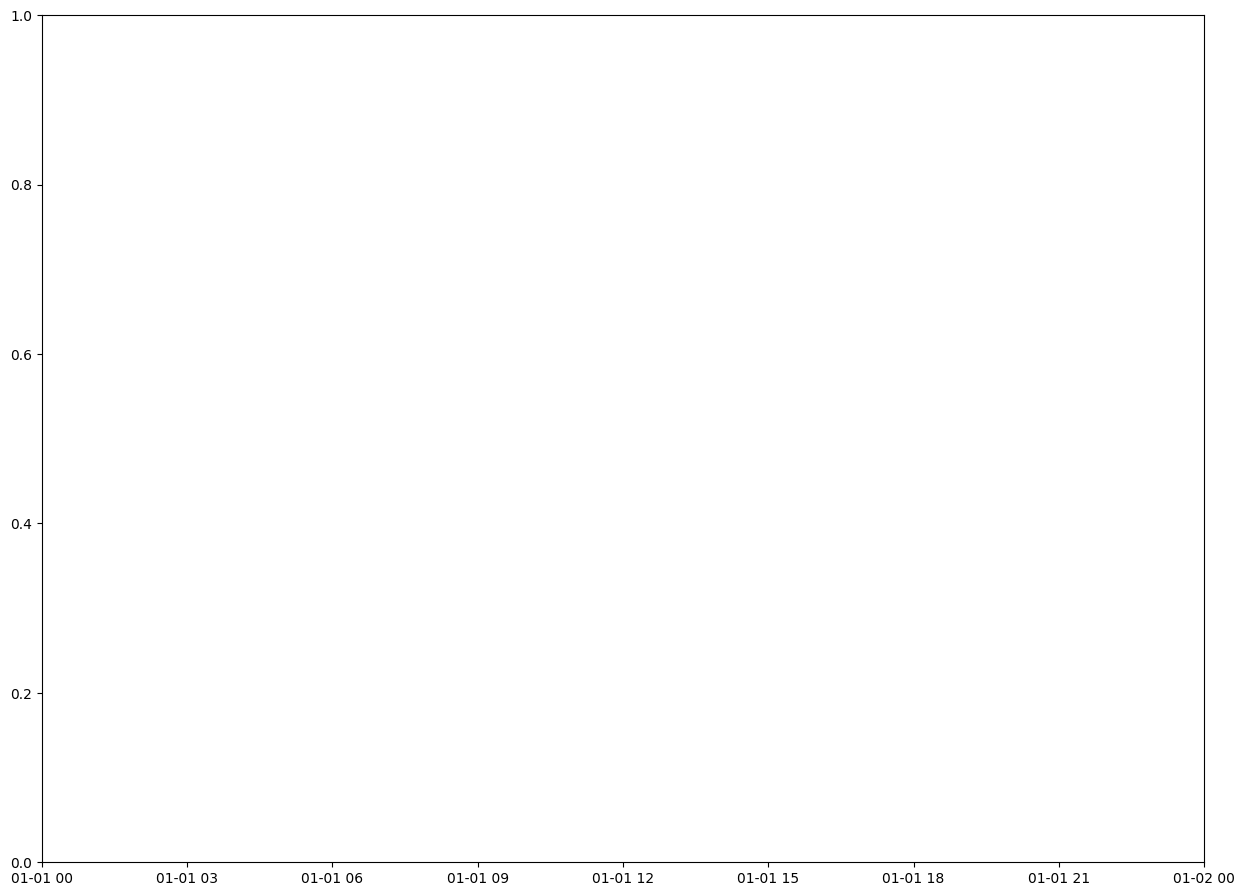

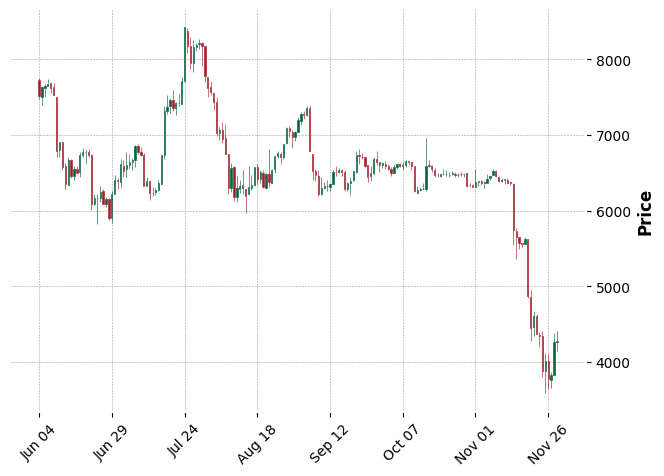

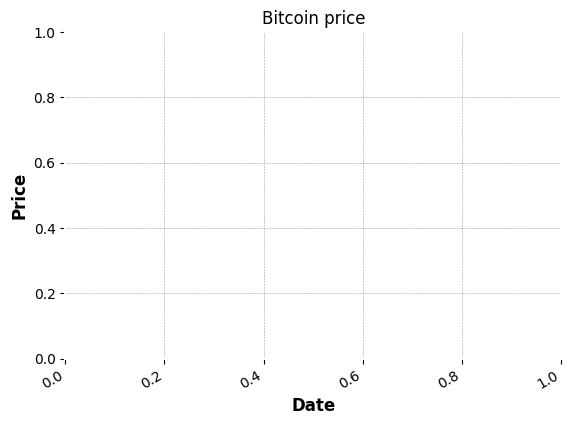

In [15]:
# Candlestick chart for Rank 1 currency (limited to 6 Months)
import mplfinance as mpf # Import the library containing candlestick_ohlc

rank = 1
months = 6

name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]
OHLCfiltered_df = filtered_df[['date','open','high','low','close']]
# Set the 'date' column as the index
OHLCfiltered_df.set_index('date', inplace=True)

f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
mpf.plot(OHLCfiltered_df, type='candle', style='charles') # Call the function using mpf.plot() with the appropriate parameters

plt.xlabel("Date")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title(name + " price")
plt.ylabel("Price")
plt.show()

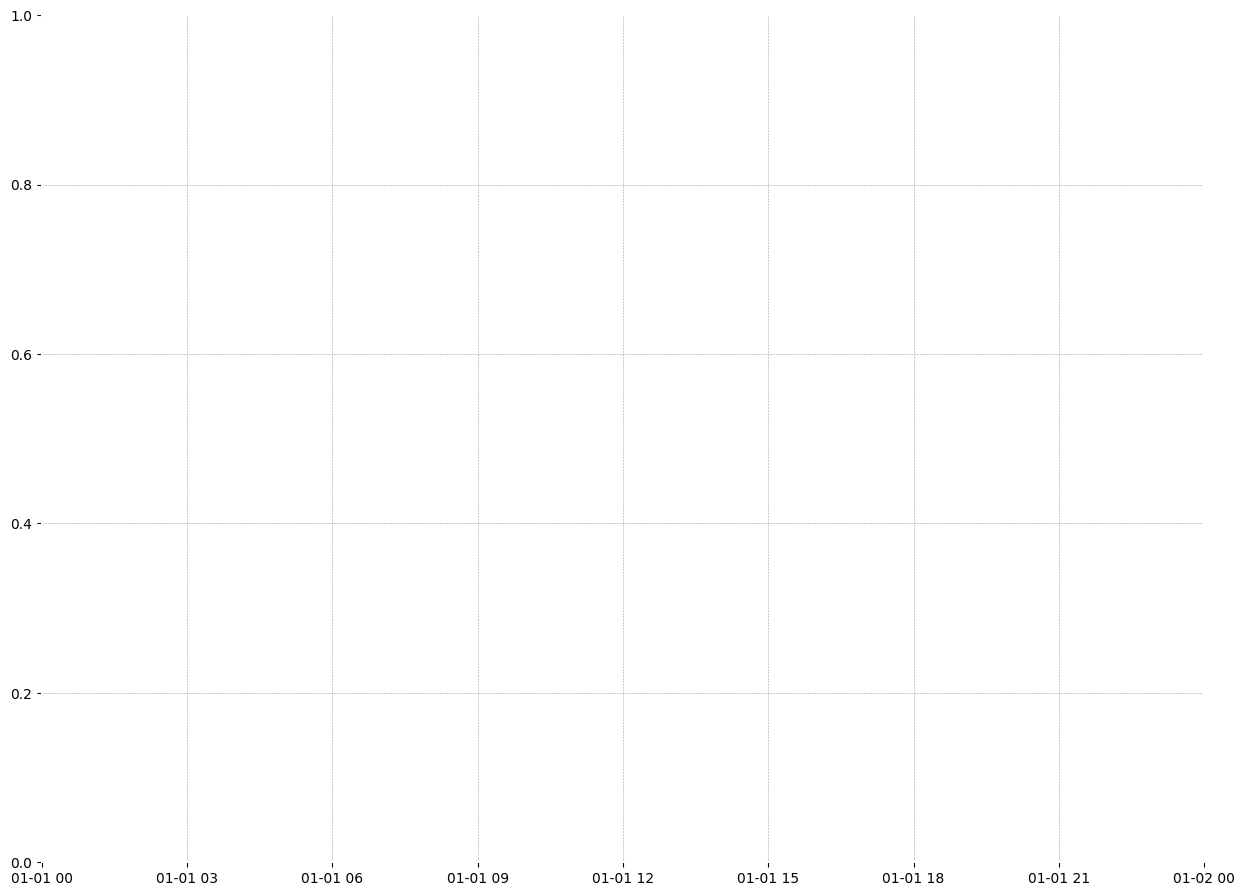

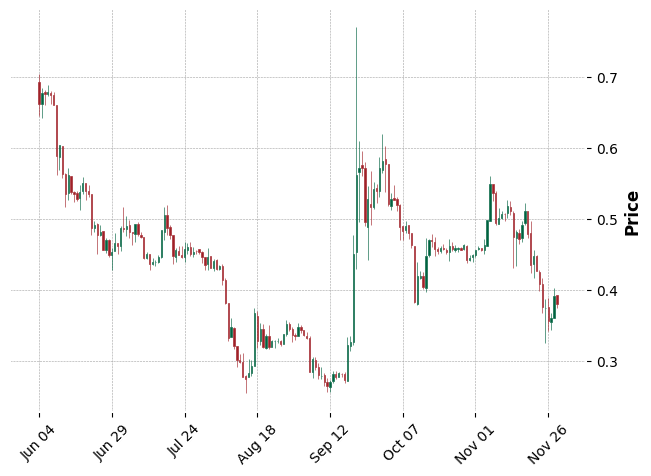

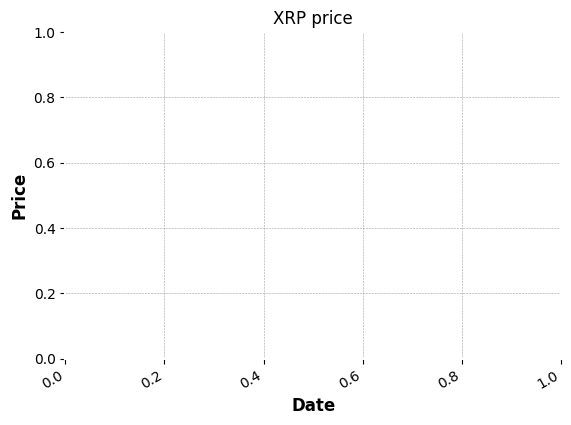

In [16]:
# Candlestick chart for Rank 2 currency (limited to 6 Months)
import mplfinance as mpf # Import the library containing candlestick_ohlc

rank = 2
months = 6

name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]
OHLCfiltered_df = filtered_df[['date','open','high','low','close']]
# Set the 'date' column as the index
OHLCfiltered_df.set_index('date', inplace=True)

f,ax=plt.subplots(figsize=(15,11))
ax.xaxis_date()
# candlestick_ohlc(ax, OHLCfiltered_df.values, width=0.5, colorup='g', colordown='r',alpha=0.75)
# Use mpf.plot() instead of candlestick_ohlc()
mpf.plot(OHLCfiltered_df, type='candle', style='charles') # Call the function using mpf.plot() with the appropriate parameters


plt.xlabel("Date")
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.title(name + " price")
plt.ylabel("Price")
plt.show()

## Moving Averages <a name="movingAverages"></a>

Let’s now consider how we can find trends in stocks.

Moving averages are one of the oldest and simplest tradng "tools" which we can use.

A n-day moving average is, for a series and a point in time, the average of the past n days.

Moving averages smooth a series and helps identify trends. The larger n is, the less responsive a moving average process is to short-term fluctuations in the series. The idea is that moving average processes help identify trends from “noise”.

Exponentially Weighted Moving Average is a statistic for monitoring the process that averages the data in a way that gives less and less weight to data as they are further removed in time.

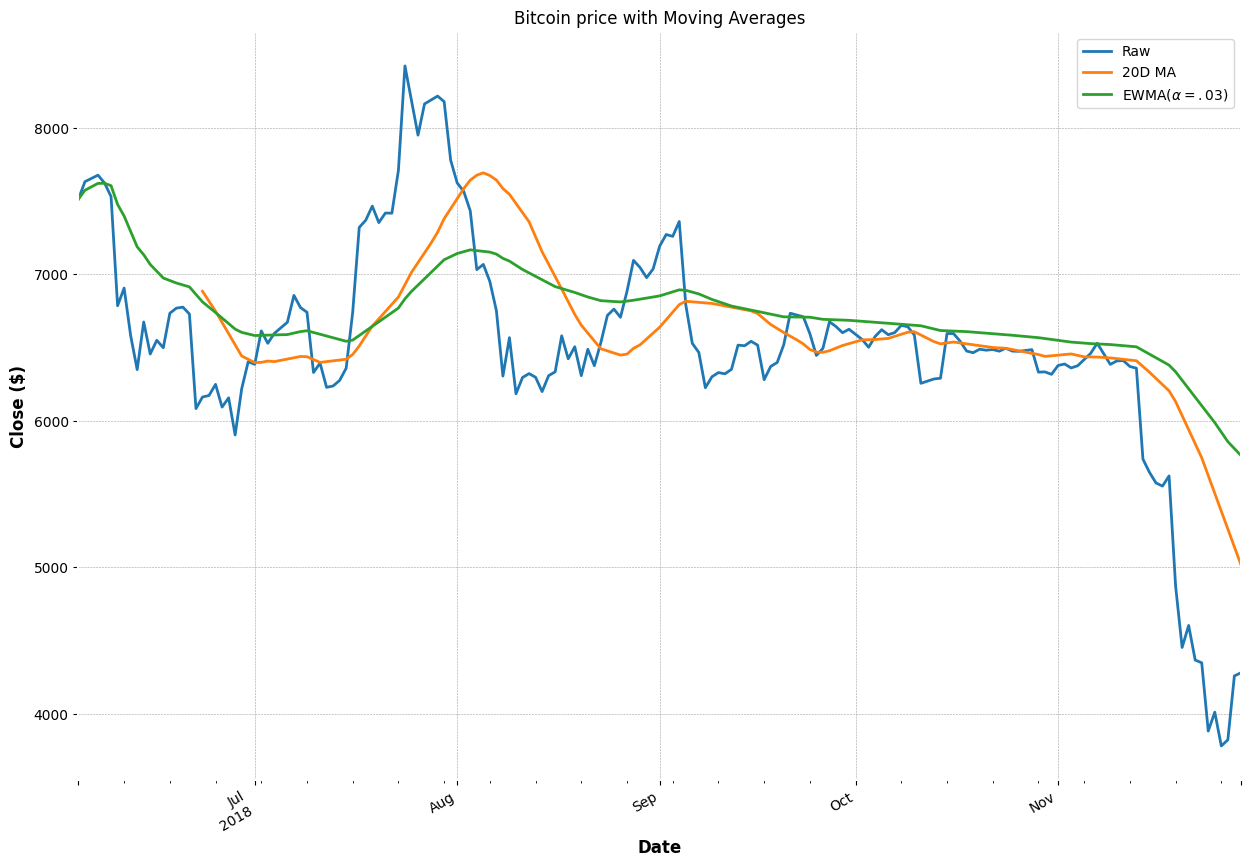

In [17]:
# Moving average chart for Rank 1 currency (6 months)
rank = 1
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

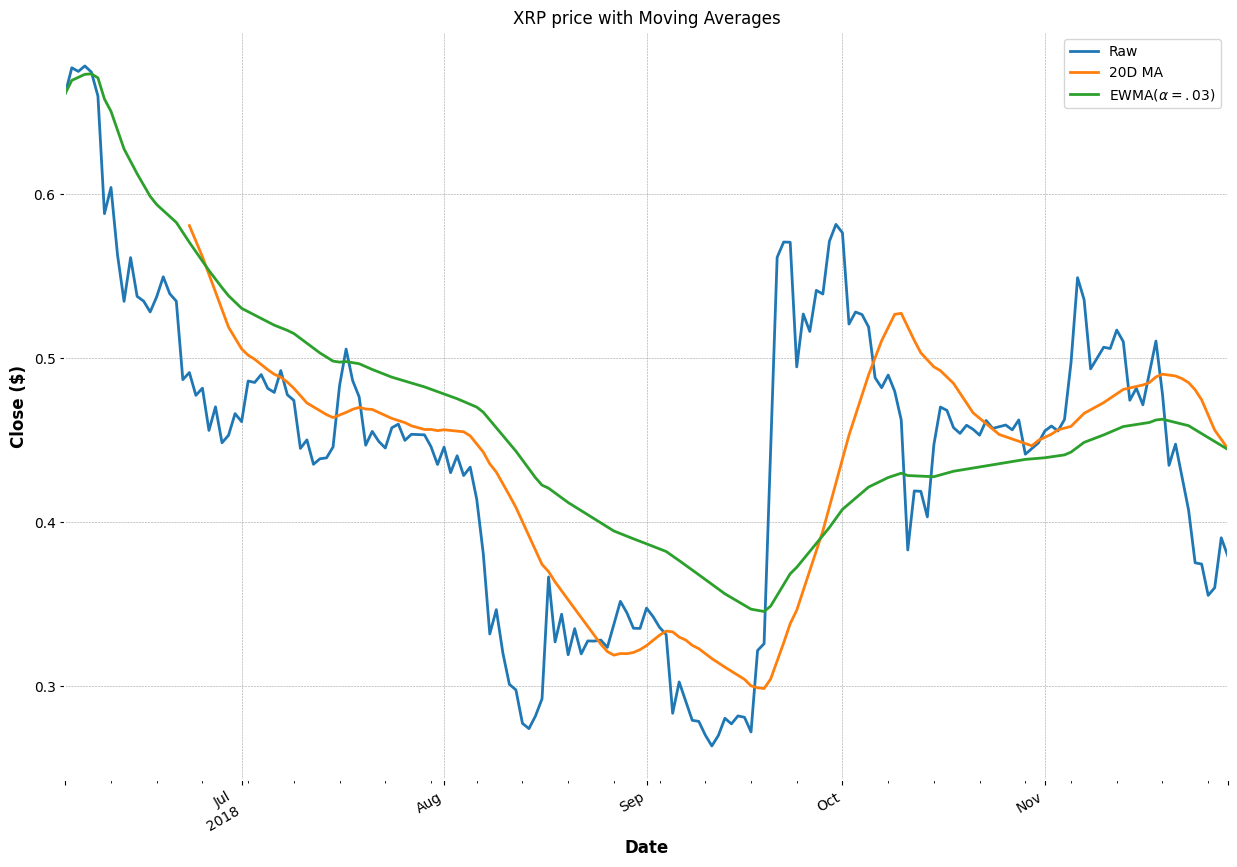

In [18]:
# Moving average chart for Rank 2 currency (6 months)
rank = 2
months = 6
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

f, ax = plt.subplots(figsize=(15,11))
filtered_df.close.plot(label='Raw', ax=ax)
filtered_df.close.rolling(20).mean().plot(label='20D MA', ax=ax)
filtered_df.close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)', ax=ax)

plt.title(name + " price with Moving Averages")
plt.legend()
plt.xlabel("Date")
plt.gcf().autofmt_xdate()
plt.ylabel("Close ($)")
plt.show()

Some consider there to be three important moving averages that can be applied to charts to help trade better. They are the following:

- The 20 moving average (20MA) is the short-term outlook.
- The 50 moving average (50MA) is the medium term outlook.
- The 200 moving average (200MA) is the trend bias.

In a good uptrend the price should be above the 20MA, the 20MA above the 50MA and the 50MA above the 200MA.
In a solid downtrend the price will be below the 20MA, the 20MA below the 50MA and the 50MA below the 200MA.

Lets see how this can apply to Bitcoin and Ethereum...

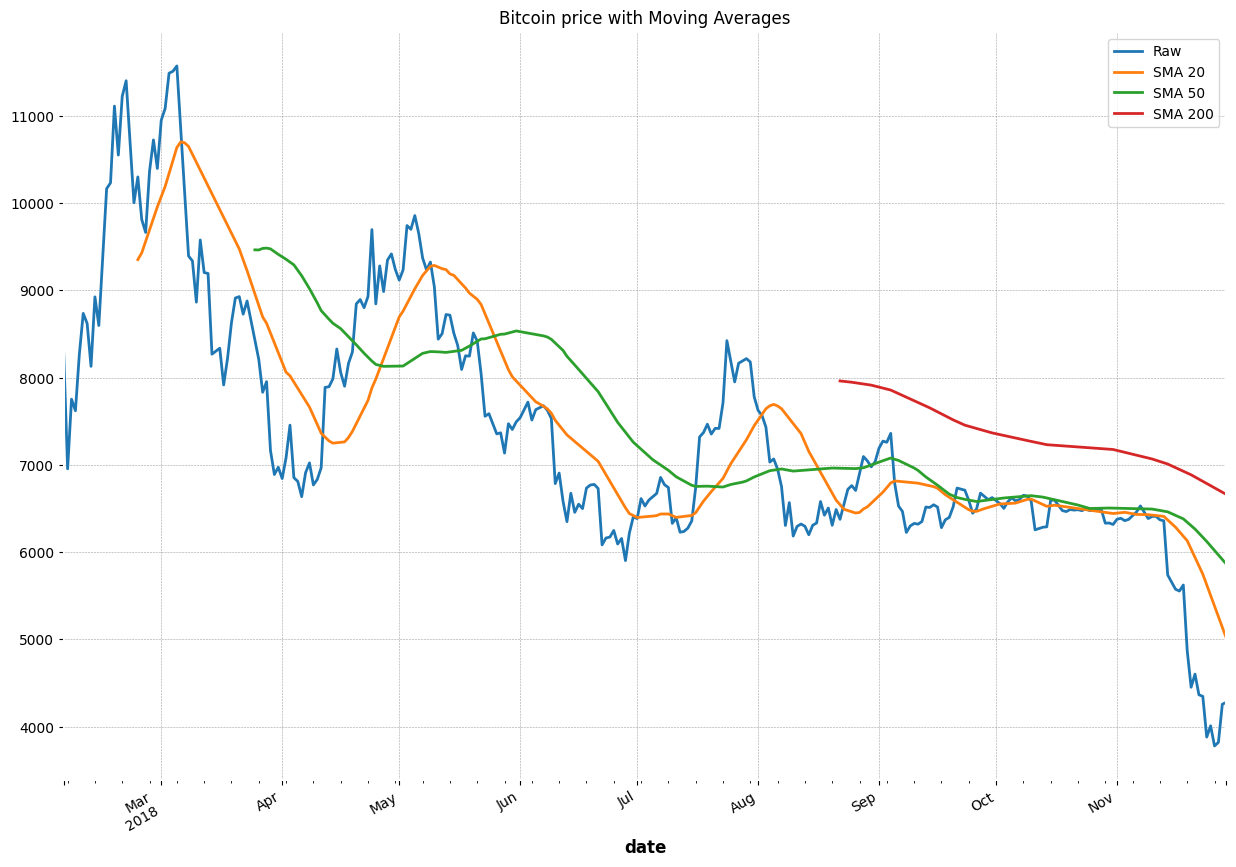

In [19]:
# Moving average chart for Rank 1 currency (10 months)
rank = 1
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

# simple moving averages
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()

smaplot = pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(15, 11), legend=True, title=name + " price with Moving Averages")

plt.gcf().autofmt_xdate()
plt.show()

We can observe the classic uptrend between mid November 2017, after the raw crosses the 20 SMA, and mid December 2017 where the raw crosses back below the 20 SMA. After that the 20 SMA also crosses the 50 SMA signalling a downtrend.

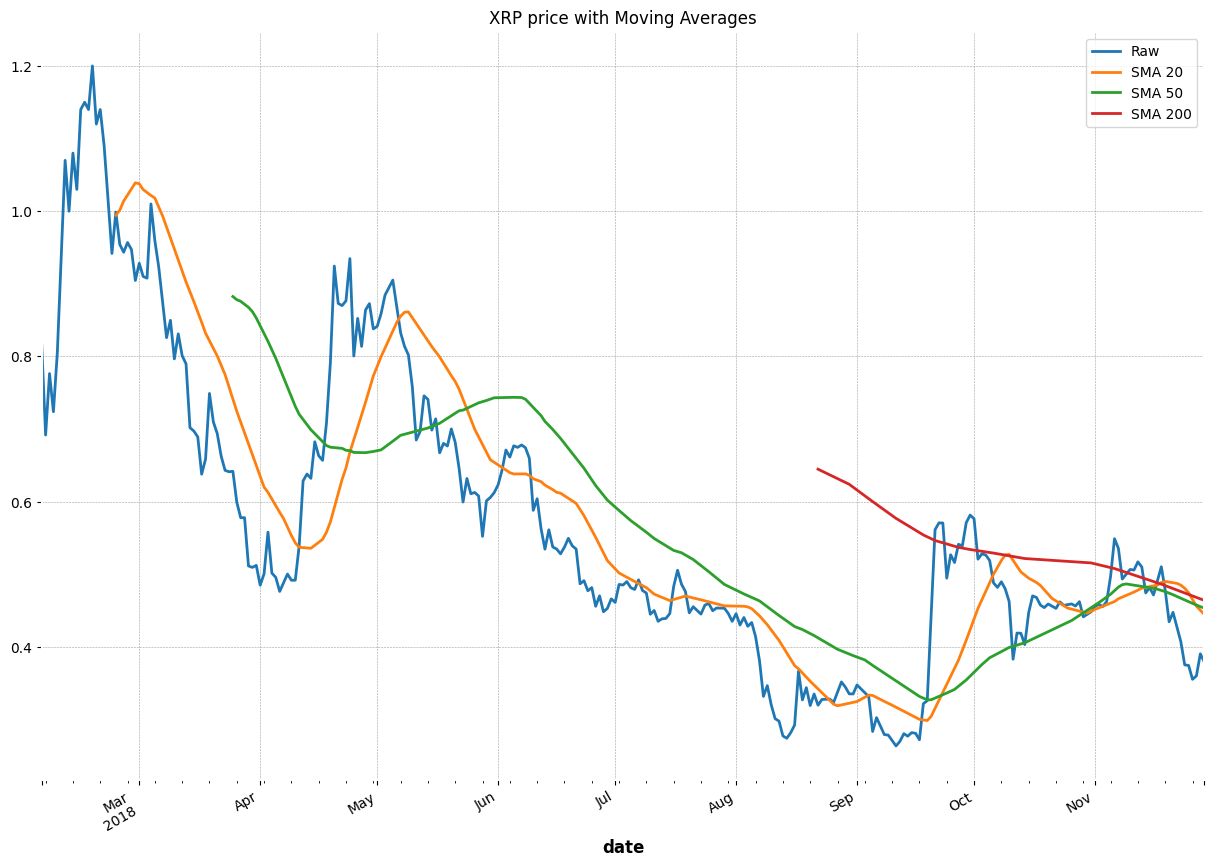

In [20]:
# Moving average chart for Rank 2 currency (10 months)
rank = 2
months = 10
name = df[df.ranknow == rank].iloc[-1]['name']
filtered_df = df[(df['ranknow'] == rank) & (df['date'] > (max(df['date']) - timedelta(days=30*months)))]

filtered_df.set_index('date', inplace=True)

# simple moving averages
sma20 = filtered_df.close.rolling(20).mean()
sma50 = filtered_df.close.rolling(50).mean()
sma200 = filtered_df.close.rolling(200).mean()

smaplot = pd.DataFrame({'Raw': filtered_df.close, 'SMA 20': sma20, 'SMA 50': sma50, 'SMA 200': sma200})
smaplot.plot(figsize=(15, 11), legend=True, title=name + " price with Moving Averages")

plt.gcf().autofmt_xdate()
plt.show()

Ethereum had a similar trend as Bitcoin but never such a strong downturn as the 20 SMA never crossed back below the 50 SMA after the November bull run.

To be continued...

Some questions which I would like to analyse/answer next:
- Include plots of trade volumes over time (eg: https://mapattack.wordpress.com/2017/02/12/using-python-for-stocks-1/)
- Which cryptocurrencies have yet to have a bull run?
- Correlation between various cryptocurrencies

TODOs:
- Turn candlestick and moving average code into functions (to get rid of duplicate code)

Please feel free to leave comments if you have any feedback or other ideas for investigation.